In [1]:
from pyforest import *

In [2]:
# ecommerce = pd.read_csv("/kaggle/input/pakistans-largest-ecommerce-dataset/Pakistan Largest Ecommerce Dataset.csv" , parse_dates = (["created_at", "Working Date"]))
ecommerce = pd.read_csv("Pakistan Largest Ecommerce Dataset.csv" , parse_dates = (["created_at", "Working Date"]))

<IPython.core.display.Javascript object>

C:\Users\H.P\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (1,3,7,8,9,11,13,14,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
ecommerce.shape

(1048575, 26)

### Data contains 1048574 rows but maximum columns contain 584524 records.

In [4]:
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   item_id                584524 non-null  float64       
 1   status                 584509 non-null  object        
 2   created_at             584524 non-null  datetime64[ns]
 3   sku                    584504 non-null  object        
 4   price                  584524 non-null  float64       
 5   qty_ordered            584524 non-null  float64       
 6   grand_total            584524 non-null  float64       
 7   increment_id           584524 non-null  object        
 8   category_name_1        584360 non-null  object        
 9   sales_commission_code  447349 non-null  object        
 10  discount_amount        584524 non-null  float64       
 11  payment_method         584524 non-null  object        
 12  Working Date           584524 non-null  da

### check that half of the rows are completely emplty.and there are 5 totally null columns also dropping these column.The tricky part is we can't drop all na rows as actual data set also contain few NA entries. We need to keep them. We will drop NA values where all entries are Null.


In [5]:
ecommerce.isnull().sum()

item_id                   464051
status                    464066
created_at                464051
sku                       464071
price                     464051
qty_ordered               464051
grand_total               464051
increment_id              464051
category_name_1           464215
sales_commission_code     601226
discount_amount           464051
payment_method            464051
Working Date              464051
BI Status                 464051
 MV                       464051
Year                      464051
Month                     464051
Customer Since            464062
M-Y                       464051
FY                        464051
Customer ID               464062
Unnamed: 21              1048575
Unnamed: 22              1048575
Unnamed: 23              1048575
Unnamed: 24              1048575
Unnamed: 25              1048575
dtype: int64

In [6]:
ecommerce.drop(["Unnamed: 21" , "Unnamed: 22" , "Unnamed: 23" , "Unnamed: 24" , "Unnamed: 25"] , axis = 1, inplace = True)#1st method
# ecommerce.iloc[: , :-5] 2nd method

### Now see completely empty unnamed columns are dropped.

In [7]:
ecommerce.columns

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', ' MV ', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID'],
      dtype='object')

### drop all empty rows.

In [8]:
ecommerce.tail(5)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
1048570,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048574,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## We will drop those NA values where all entries are Null.

In [9]:
ecommerce = ecommerce.dropna(how = "all")

In [10]:
ecommerce.tail(5)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
584519,905204.0,cod,2018-08-28,WOFSCE5AE00357AECDE,699.0,1.0,849.0,100562385,Women's Fashion,NaN,...,cod,2018-08-28,Valid,699,2018.0,8.0,2018-8,8-2018,FY19,115320.0
584520,905205.0,processing,2018-08-28,MATHUA5AF70A7D1E50A,35599.0,1.0,35899.0,100562386,Mobiles & Tablets,NaN,...,bankalfalah,2018-08-28,Gross,"35,599",2018.0,8.0,2018-8,8-2018,FY19,115326.0
584521,905206.0,processing,2018-08-28,MATSAM5B6D7208C6D30,129999.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,...,bankalfalah,2018-08-28,Gross,"259,998",2018.0,8.0,2018-7,8-2018,FY19,113474.0
584522,905207.0,processing,2018-08-28,MATSAM5B1509B4696EA,87300.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,...,bankalfalah,2018-08-28,Gross,"174,600",2018.0,8.0,2018-7,8-2018,FY19,113474.0
584523,905208.0,processing,2018-08-28,MATSAM5B10F91A9B6AB,108640.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,...,bankalfalah,2018-08-28,Gross,"217,280",2018.0,8.0,2018-7,8-2018,FY19,113474.0


### fill some null rows with mode value of a column.

In [11]:
ecommerce.isnull().sum()

item_id                       0
status                       15
created_at                    0
sku                          20
price                         0
qty_ordered                   0
grand_total                   0
increment_id                  0
category_name_1             164
sales_commission_code    137175
discount_amount               0
payment_method                0
Working Date                  0
BI Status                     0
 MV                           0
Year                          0
Month                         0
Customer Since               11
M-Y                           0
FY                            0
Customer ID                  11
dtype: int64

In [12]:
ecommerce["status"].mode()

0    complete
dtype: object

In [13]:
ecommerce["status"].fillna("complete" , inplace=True)

In [14]:
ecommerce["category_name_1"].mode()

0    Mobiles & Tablets
dtype: object

In [15]:
ecommerce["category_name_1"].fillna("Mobiles & Tablets" , inplace = True)

### There is extra space in MV column remove spaces from column.

In [16]:
ecommerce.columns = ecommerce.columns.str.replace(" MV " , "MV").str.replace('created_at' , 'order_date') #1st method
# ecommerce.rename(columns = {' MV ':'MV'}, inplace = True) 2nd method

In [17]:
ecommerce.dtypes

item_id                         float64
status                           object
order_date               datetime64[ns]
sku                              object
price                           float64
qty_ordered                     float64
grand_total                     float64
increment_id                     object
category_name_1                  object
sales_commission_code            object
discount_amount                 float64
payment_method                   object
Working Date             datetime64[ns]
BI Status                        object
MV                               object
Year                            float64
Month                           float64
Customer Since                   object
M-Y                              object
FY                               object
Customer ID                     float64
dtype: object

### As we can see above, few columns are not in correct data type. We need to perform casting and change his data type.

In [18]:
ecommerce['Customer ID'] = ecommerce['Customer ID'].astype(str)
ecommerce['item_id'] = ecommerce['item_id'].astype(str)
ecommerce['qty_ordered'] = ecommerce['qty_ordered'].astype(int)  
ecommerce["Month"] = ecommerce["Month"].astype(int)
ecommerce["Year"] = ecommerce["Year"].astype(int)

In [19]:
ecommerce.dtypes

item_id                          object
status                           object
order_date               datetime64[ns]
sku                              object
price                           float64
qty_ordered                       int32
grand_total                     float64
increment_id                     object
category_name_1                  object
sales_commission_code            object
discount_amount                 float64
payment_method                   object
Working Date             datetime64[ns]
BI Status                        object
MV                               object
Year                              int32
Month                             int32
Customer Since                   object
M-Y                              object
FY                               object
Customer ID                      object
dtype: object

## Task 1

# Best Selling category


In [20]:
pd.options.display.max_rows = None

<IPython.core.display.Javascript object>

In [21]:
ecommerce["category_name_1"].head(10)

0      Women's Fashion
1    Beauty & Grooming
2      Women's Fashion
3    Beauty & Grooming
4              Soghaat
5              Soghaat
6    Beauty & Grooming
7              Soghaat
8    Mobiles & Tablets
9    Mobiles & Tablets
Name: category_name_1, dtype: object

## Mobiles & Tablets are Best Selling category in Ecommerce.
#### these seven categories , Mobiles & Tablets  ,  Men's Fashion ,  Women's Fashion , Appliances  , Superstore  , Beauty & Grooming  , soghaat  contributed 70% in the best selling category . these items are most sells compared to other categories.

In [22]:
ecommerce["category_name_1"].value_counts()

Mobiles & Tablets     115874
Men's Fashion          92221
Women's Fashion        59721
Appliances             52413
Superstore             43613
Beauty & Grooming      41496
Soghaat                34011
Others                 29218
Home & Living          26504
Entertainment          26326
Health & Sports        17502
Kids & Baby            16494
Computing              15933
\N                      7850
School & Education      3478
Books                   1870
Name: category_name_1, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

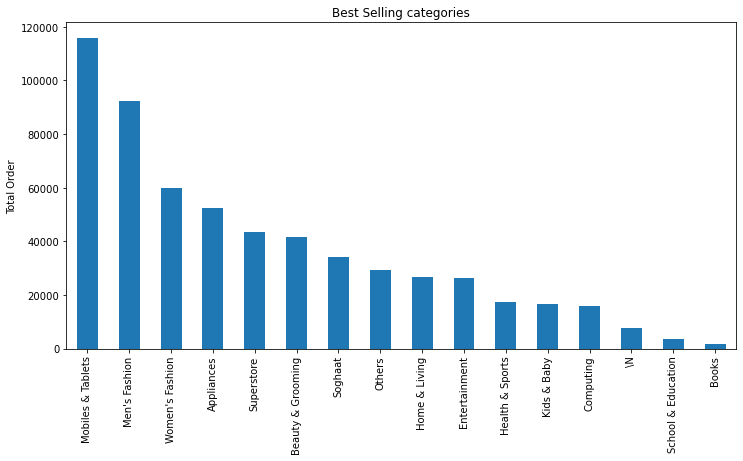

In [23]:
ecommerce["category_name_1"].value_counts().plot.bar(figsize = (12,6) , title = "Best Selling categories")
plt.ylabel("Total Order")
plt.show()

## Task 2 

# Visualize Payment Methods versus Order Status

In [24]:
ecommerce.head(1)

,item_id,status,order_date,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131.0,complete,2016-07-01,kreations_YI 06-L,1950.0,1,1950.0,100147443,Women's Fashion,\N,...,cod,2016-07-01,#REF!,"1,950",2016,7,2016-7,7-2016,FY17,1.0


In [25]:
ecommerce["status"].value_counts()

complete          233700
canceled          201249
received           77290
order_refunded     59529
refund              8050
cod                 2859
paid                1159
closed               494
payment_review        57
pending               48
processing            33
holded                31
fraud                 10
pending_paypal         7
exchange               4
\N                     4
Name: status, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

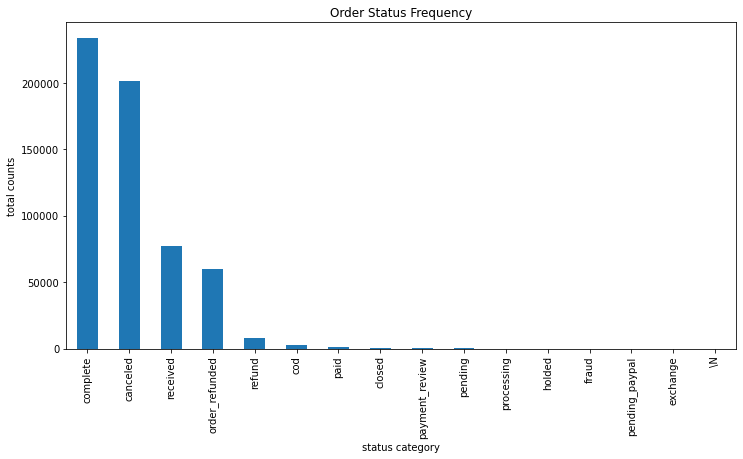

In [26]:
ecommerce["status"].value_counts().plot.bar(figsize = (12,6) , title = "Order Status Frequency")
plt.xlabel("status category")
plt.ylabel("total counts")
plt.show()

# Order Status per Year

### In the year 2016 completed order quantity is 74610 its a good sign for ecommerce .but from other site 39624 order is cancell also. and 14034 order refunded also.
### In the year 2017 maximum orders are completed comapred to other year about 123489.2017 94781 order are cancell aslo.34119 order recieved.3370 orders are refund in the year 2017 is the highest refund order year.
### In the year 2018 minimum orders are completed about 35601.but received order is maximum 40286 from other year.cancellled order is  maximum in the this year about 67004 order are cancelled.1285 orders are refund in the 2018 year.


In [27]:
ecommerce["Year"].unique()

array([2016, 2017, 2018])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

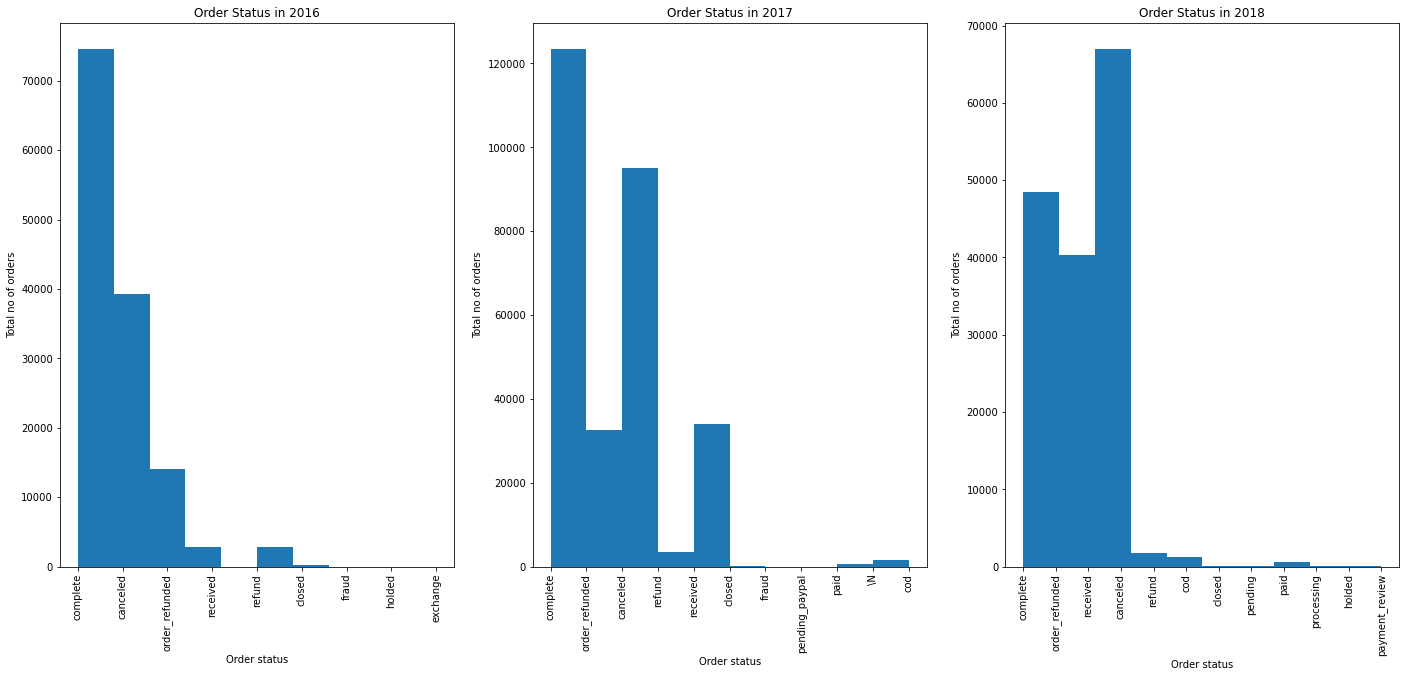

In [28]:
stats_2016 = ecommerce[ecommerce["Year"]== 2016].status           
stats_2017 = ecommerce[ecommerce["Year"]== 2017].status 
stats_2018 = ecommerce[ecommerce["Year"]== 2018].status 

plt.figure(figsize=(24 , 10))

#histogram for 2019
plt.subplot(1,3,1)
plt.title('Order Status in 2016')
plt.xlabel('Order status')
plt.ylabel('Total no of orders')
plt.xticks(rotation = 90)
plt.hist(stats_2016)

#histogram for 2017
plt.subplot(1,3,2)
plt.title('Order Status in 2017')
plt.xlabel('Order status')
plt.ylabel('Total no of orders')
plt.xticks(rotation = 90)
plt.hist(stats_2017)

#histogram for 2018
plt.subplot(1,3,3)
plt.title('Order Status in 2018')
plt.xlabel('Order status')
plt.ylabel('Total no of orders')
plt.xticks(rotation = 90)
plt.hist(stats_2018)
plt.show()


In [29]:
ecommerce["payment_method"].value_counts()

cod                  271960
Payaxis               97641
Easypay               82900
jazzwallet            35145
easypay_voucher       31176
bankalfalah           23065
jazzvoucher           15633
Easypay_MA            14028
customercredit         7555
apg                    1758
ublcreditcard           882
cashatdoorstep          732
mcblite                 723
mygateway               669
internetbanking         472
productcredit           125
marketingexpense         45
financesettlement        15
Name: payment_method, dtype: int64

### cod replace with his full name cash_on_Delivery

In [30]:
ecommerce["payment_method"] = ecommerce["payment_method"].str.replace("cod" , "cash_on_delivery") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

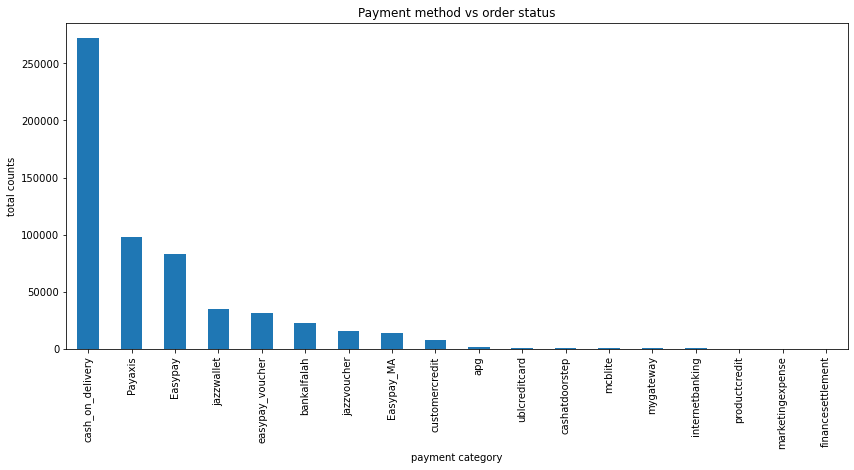

In [31]:
ecommerce["payment_method"].value_counts().plot.bar(figsize = (14,6) , title = "Payment method vs order status")
plt.xlabel("payment category")
plt.ylabel("total counts")
plt.show()

## Task 3

# Payment Method and Status Co-relation

### Now, Plot corelation between completed orders and Payment Methods

In [32]:
corr_comp = ecommerce.loc[ecommerce["status"] == "complete"]["payment_method"].value_counts().to_frame("payment_method")
corr_comp

,payment_method
cash_on_delivery,148053
Payaxis,22809
Easypay,19214
easypay_voucher,16066
jazzwallet,13505
jazzvoucher,4619
customercredit,4151
Easypay_MA,3116
cashatdoorstep,674
bankalfalah,587


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

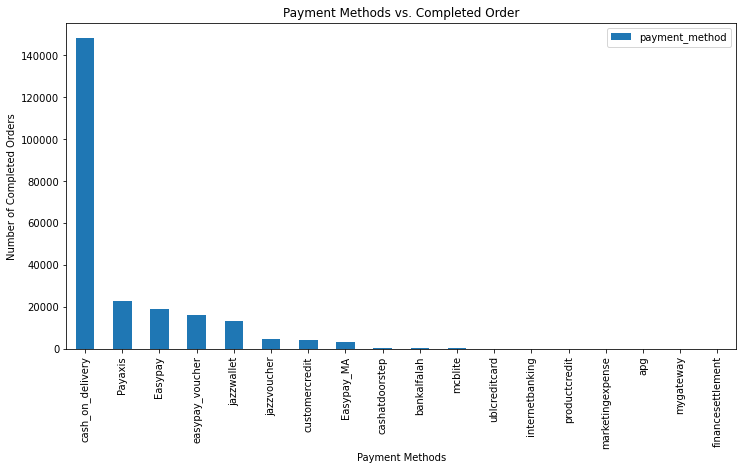

In [33]:
corr_comp.plot.bar(figsize = (12,6) , title = "Payment Methods vs. Completed Order")
plt.xlabel("Payment Methods")
plt.ylabel("Number of Completed Orders")
plt.show()


### Now, Plot corelation between cancelled orders and Payment Methods

In [34]:
corr_can = ecommerce.loc[ecommerce["status"] == "canceled"]["payment_method"].value_counts().to_frame("payment_method")
corr_can

,payment_method
Payaxis,61267
Easypay,52040
cash_on_delivery,21753
jazzwallet,16933
bankalfalah,16184
easypay_voucher,12189
Easypay_MA,9210
jazzvoucher,8472
apg,1361
ublcreditcard,660


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

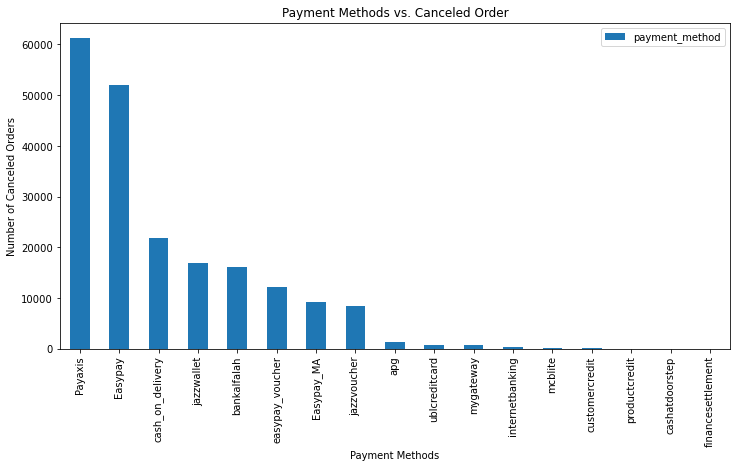

In [35]:
corr_can.plot.bar(figsize = (12,6) , title = "Payment Methods vs. Canceled Order")
plt.xlabel("Payment Methods")
plt.ylabel("Number of Canceled Orders")
plt.show()


In [36]:
corr_ord_ref = ecommerce.loc[ecommerce["status"] == "order_refunded"]["payment_method"].value_counts().to_frame("payment_method")
corr_ord_ref

,payment_method
cash_on_delivery,48771
Payaxis,3813
Easypay,2622
customercredit,1269
jazzwallet,835
bankalfalah,746
easypay_voucher,480
jazzvoucher,412
Easypay_MA,315
mcblite,137


### Now, Plot corelation between refunded orders and Payment Methods¶

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

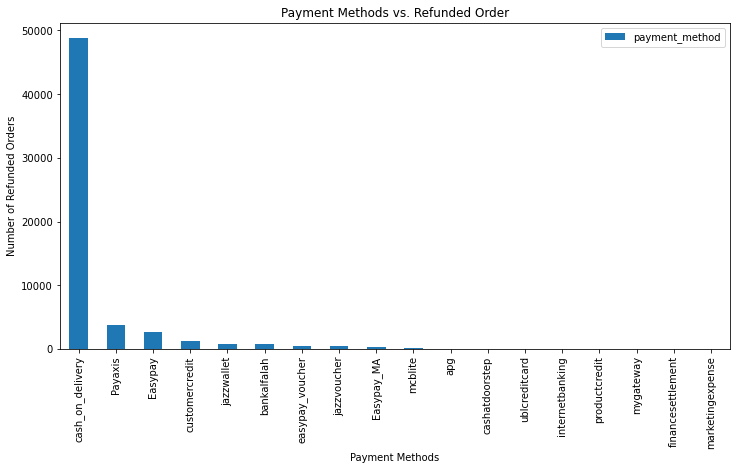

In [37]:
corr_ord_ref.plot.bar(figsize = (12,6) , title = "Payment Methods vs. Refunded Order")
plt.xlabel("Payment Methods")
plt.ylabel("Number of Refunded Orders")
plt.show()

In [38]:
corr_received = ecommerce.loc[ecommerce["status"] == "received"]["payment_method"].value_counts().to_frame("payment_method")
corr_received

,payment_method
cash_on_delivery,44555
Payaxis,8709
Easypay,8036
bankalfalah,5166
jazzwallet,3416
easypay_voucher,2147
jazzvoucher,1993
customercredit,1740
Easypay_MA,1208
apg,305


### Now, Plot corelation between Recieved orders and Payment Methods¶

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

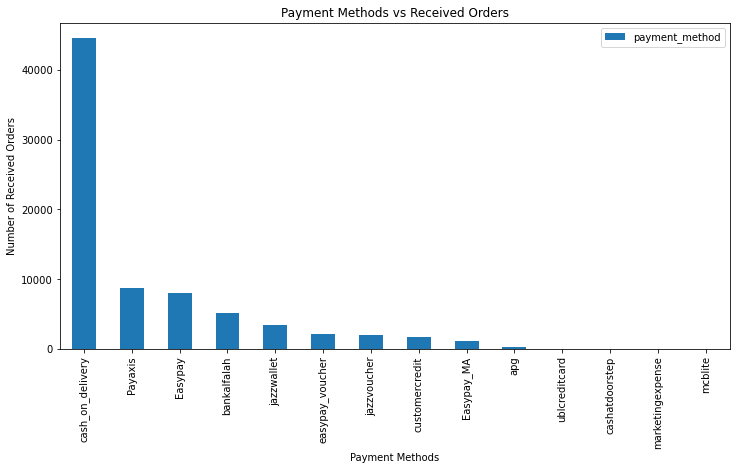

In [39]:
corr_received.plot.bar(figsize = (12,6) , title = "Payment Methods vs Received Orders")
plt.xlabel("Payment Methods")
plt.ylabel("Number of Received Orders")
plt.show()

In [40]:
corr_refund = ecommerce.loc[ecommerce["status"] == "refund"]["payment_method"].value_counts().to_frame("payment_method")
corr_refund

,payment_method
cash_on_delivery,5568
Easypay,729
Payaxis,553
jazzwallet,292
easypay_voucher,241
customercredit,223
Easypay_MA,144
jazzvoucher,117
bankalfalah,114
cashatdoorstep,18


### Now, Plot corelation between order refund and Payment Methods¶

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

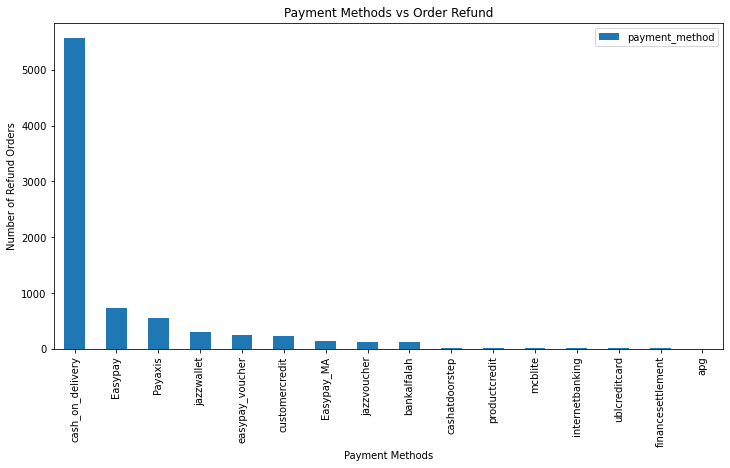

In [41]:
corr_refund.plot.bar(figsize = (12,6) , title = "Payment Methods vs Order Refund")
plt.xlabel("Payment Methods")
plt.ylabel("Number of Refund Orders")
plt.show()

## We need to perform casting.for seeing these object columns correlation.

### .cat.codes converts your category from a string representation into an integer representation. For example, cod would be replaced with 0, complete would be replaced with 1, payaxis would be replaced with 2. In the other column, cancelled would be replaced with 0 and easypay would be replaced with 1 

In [42]:
ecommerce["payment_method_correlation"] = ecommerce["payment_method"].astype("category").cat.codes
ecommerce["status_correlation"] = ecommerce["status"].astype("category").cat.codes

##  We can say that there is 'no or weak' correlation  between Payment method and Status columns.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

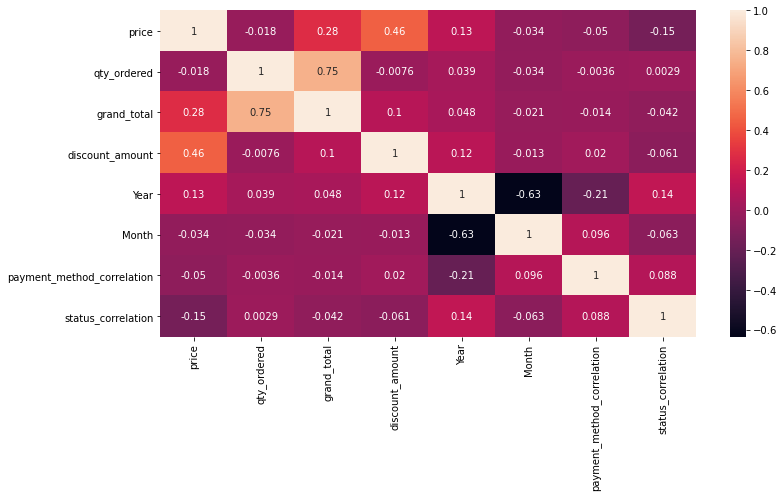

In [43]:
plt.figure(figsize = (12,6))
sns.heatmap(ecommerce.corr() ,annot = True)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

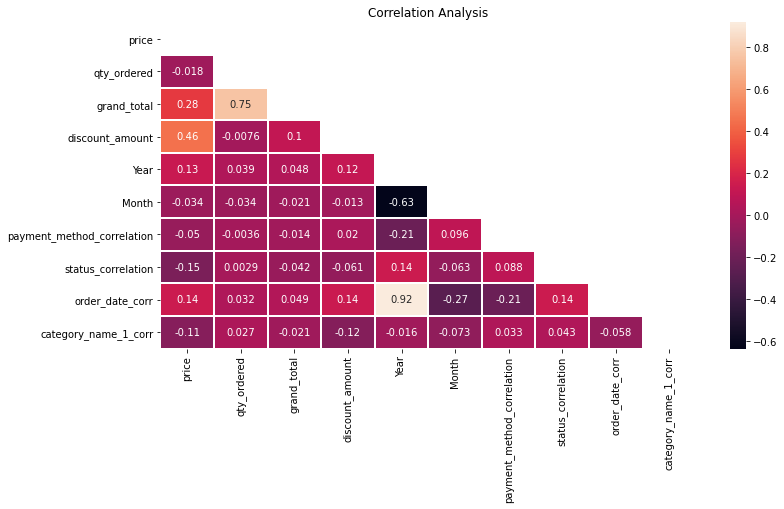

In [60]:
corr = ecommerce.corr()
mask = np.triu(np.ones_like(corr,dtype = bool))
plt.figure(figsize = (12 , 6))
plt.title('Correlation Analysis')
sns.heatmap(ecommerce.corr(),mask=mask,annot=True,lw=1,linecolor='white')
plt.xticks()
plt.yticks()
plt.show()

## see there is no correlation in these columns.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

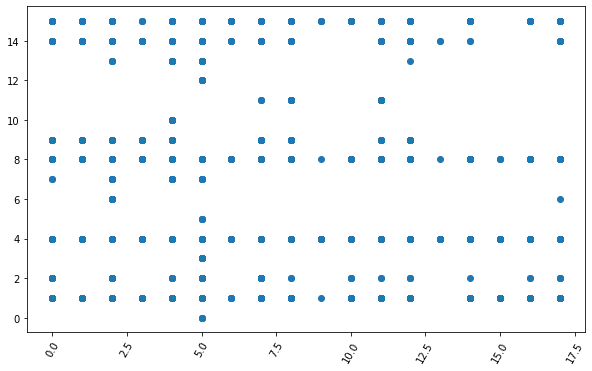

In [44]:
fig = plt.figure(figsize = (10 , 6))
plt.scatter(ecommerce["payment_method_correlation"] , ecommerce["status_correlation"])
plt.xticks(rotation = 60)
plt.show()

## Task 4

# Find a correlation between order date and item category

In [45]:
ecommerce.head()

,item_id,status,order_date,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,payment_method_correlation,status_correlation
0,211131.0,complete,2016-07-01,kreations_YI 06-L,1950.0,1,1950.0,100147443,Women's Fashion,\N,...,#REF!,"1,950",2016,7,2016-7,7-2016,FY17,1.0,5,4
1,211133.0,canceled,2016-07-01,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1,240.0,100147444,Beauty & Grooming,\N,...,Gross,240,2016,7,2016-7,7-2016,FY17,2.0,5,1
2,211134.0,canceled,2016-07-01,Ego_UP0017-999-MR0,2450.0,1,2450.0,100147445,Women's Fashion,\N,...,Gross,"2,450",2016,7,2016-7,7-2016,FY17,3.0,5,1
3,211135.0,complete,2016-07-01,kcc_krone deal,360.0,1,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,Net,360,2016,7,2016-7,7-2016,FY17,4.0,5,4
4,211136.0,order_refunded,2016-07-01,BK7010400AG,555.0,2,1110.0,100147447,Soghaat,\N,...,Valid,"1,110",2016,7,2016-7,7-2016,FY17,5.0,5,8


## correlation between order_date and category_name is 'negative weak'.clearly shown in heatmap.

In [46]:
ecommerce["order_date_corr"] = ecommerce["order_date"].astype("category").cat.codes
ecommerce["category_name_1_corr"] = ecommerce["category_name_1"].astype("category").cat.codes

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

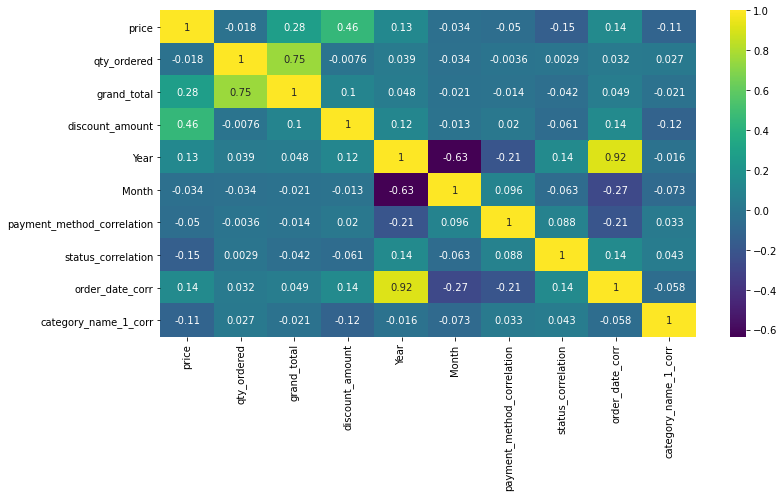

In [59]:
plt.figure(figsize = (12,6))
sns.heatmap(ecommerce.corr() ,annot = True , cmap='viridis')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

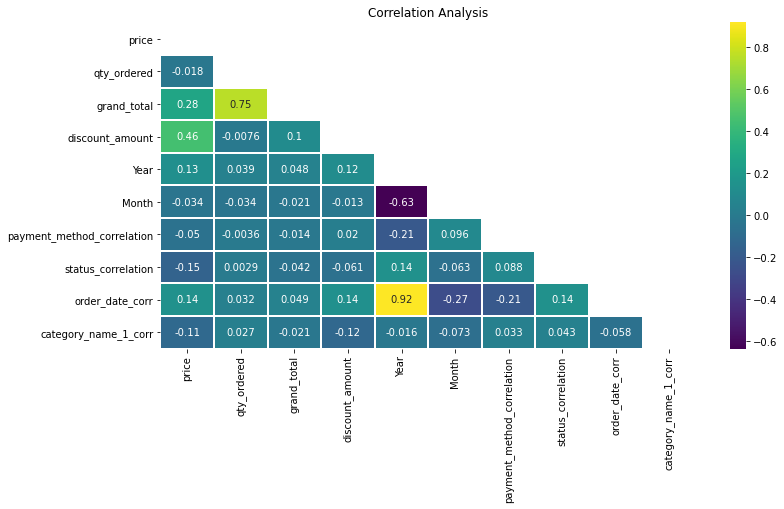

In [58]:
corr = ecommerce.corr()
mask = np.triu(np.ones_like(corr,dtype = bool))
plt.figure(figsize = (12 , 6))
plt.title('Correlation Analysis')
sns.heatmap(ecommerce.corr(),mask=mask,annot=True,lw=1,linecolor='white',cmap='viridis')
plt.xticks()
plt.yticks()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

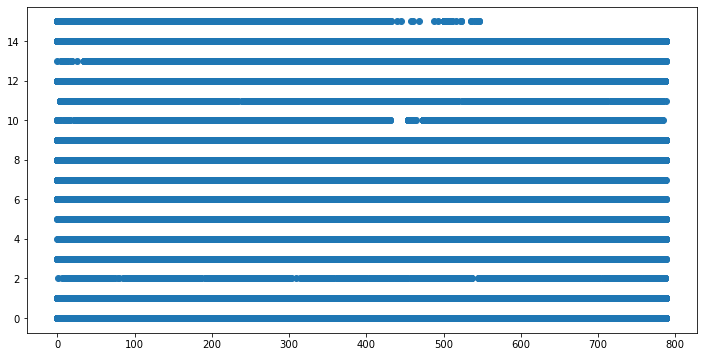

In [49]:
plt.figure(figsize = (12,6))
plt.scatter(ecommerce["order_date_corr"] , ecommerce["category_name_1_corr"])